In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from collections import Counter
from scipy.stats import randint
import warnings

warnings.filterwarnings('ignore')


In [111]:
df = pd.read_csv('heart.csv')

In [112]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [113]:
df.shape

(918, 12)

In [114]:
df.drop_duplicates()

In [115]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [116]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [117]:
chest_pain_mapping = {'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3}

In [118]:
df['ChestPainType'] = df['ChestPainType'].map(chest_pain_mapping)


In [119]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [120]:
ecg_mapping = {'Normal': 0, 'ST': 1, 'LVH': 2}

In [121]:
df['RestingECG'] = df['RestingECG'].map(ecg_mapping)

In [122]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [123]:
st_slope_mapping = {'Up': 0, 'Flat': 1, 'Down': 2}

In [124]:
df['ST_Slope'] = df['ST_Slope'].map(st_slope_mapping)

In [125]:
df['ExerciseAngina'] = df['ExerciseAngina'].apply(lambda x: 1 if x == 'Y' else 0)

In [126]:
df.dtypes

Age                 int64
Sex                object
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [127]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [128]:
df.describe()

Age  ChestPainType   RestingBP  Cholesterol   FastingBS  \
count  918.000000     918.000000  918.000000   918.000000  918.000000   
mean    53.510893       0.748366  132.396514   198.799564    0.233115   
std      9.432617       0.931031   18.514154   109.384145    0.423046   
min     28.000000       0.000000    0.000000     0.000000    0.000000   
25%     47.000000       0.000000  120.000000   173.250000    0.000000   
50%     54.000000       0.000000  130.000000   223.000000    0.000000   
75%     60.000000       1.000000  140.000000   267.000000    0.000000   
max     77.000000       3.000000  200.000000   603.000000    1.000000   

       RestingECG       MaxHR  ExerciseAngina     Oldpeak    ST_Slope  \
count  918.000000  918.000000      918.000000  918.000000  918.000000   
mean     0.603486  136.809368        0.404139    0.887364    0.638344   
std      0.805968   25.460334        0.490992    1.066570    0.607056   
min      0.000000   60.000000        0.000000   -2.600000    0.000000   
25%      0.000000  120.000000        0.000000    0.000000    0.000000   
50%      0.000000  138.000000        0.000000    0.600000    1.000000   
75%      1.000000  156.000000        1.000000    1.500000    1.000000   
max      2.000000  202.000000        1.000000    6.200000    2.000000   

       HeartDisease  
count    918.000000  
mean       0.553377  
std        0.497414  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [129]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [130]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# XGBoost

In [132]:
import xgboost as xgb

In [133]:
params = {"objective": "binary:logistic", "num_class": 1,'learning_rate':0.05,'seed':42,'n_estimators':50,
          'max_depth': 4,'subsample':1,'gamma':1,'colsample_bytree':0.9}

model = xgb.XGBClassifier(**params)

evals = [(X_train, y_train)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")

print("Cross-Validation accuracy Scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-Validation accuracy Scores: [0.87755102 0.84353741 0.86394558 0.89115646 0.8630137 ]
Mean accuracy: 0.8678408349641226


In [134]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, num_class=1,
              num_parallel_tree=None, ...)

In [135]:
y_pred_xg = model.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_xg)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[67 10]
 [10 97]]


In [137]:
accuracy_score(y_train, model.predict(X_train))

0.9073569482288828

In [138]:
accuracy_XG = accuracy_score(y_test, y_pred_xg)
precision_XG = precision_score(y_test, y_pred_xg, pos_label=1)
recall_XG = recall_score(y_test, y_pred_xg, pos_label=1)
f1_XG = f1_score(y_test, y_pred_xg, pos_label=1)

In [139]:
print(f'Accuracy:{accuracy_XG}\nPrecision:{precision_XG}\nRecall:{recall_XG}\nf1:{f1_XG}')

Accuracy:0.8913043478260869
Precision:0.9065420560747663
Recall:0.9065420560747663
f1:0.9065420560747663


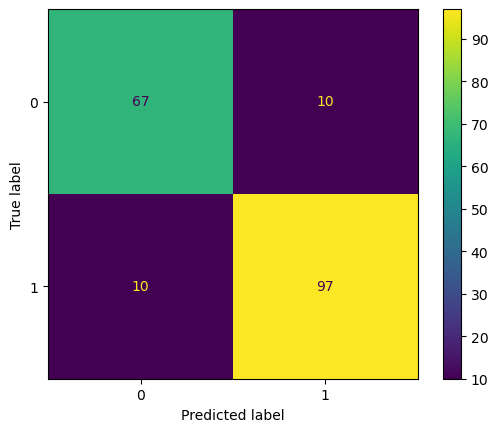

In [140]:
conf_matrix = confusion_matrix(y_test, y_pred_xg)
ConfusionMatrixDisplay(conf_matrix).plot();

# Random Forest

In [141]:
rf_classifier = RandomForestClassifier(n_estimators=280,min_samples_split=10,max_depth=20,min_samples_leaf=2
                                       ,random_state=42)

In [142]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_scores

array([0.87755102, 0.84353741, 0.86394558, 0.89115646, 0.8630137 ])

In [143]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=280, random_state=42)

In [144]:
y_pred_rf = rf_classifier.predict(X_test)

In [145]:
accuracy_score(y_train, rf_classifier.predict(X_train))

0.9305177111716622

In [146]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

In [147]:
print(f'Accuracy:{accuracy_rf}\nPrecision:{precision_rf}\nRecall:{recall_rf}\nf1:{f1_rf}')

Accuracy:0.8967391304347826
Precision:0.9230769230769231
Recall:0.897196261682243
f1:0.9099526066350712


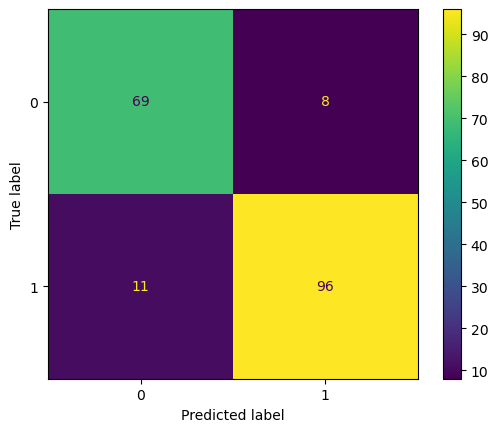

In [148]:
cm = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Stack Classifier

In [149]:
clf1 = LogisticRegression(C=1)
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1)

In [150]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

meta_model = LogisticRegression(C=10.0, penalty='l2')  # You can use the best parameters for the meta-model here

stacking_classifier = StackingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    final_estimator=LogisticRegression(),
    stack_method='auto',
)

In [151]:
stacking_classifier.fit(X_train_normalized, y_train)

y_pred_sc = stacking_classifier.predict(X_test_normalized)

In [152]:
accuracy_score(y_train, stacking_classifier.predict(X_train_normalized))

0.9904632152588556

In [153]:
accuracy_sc = accuracy_score(y_test, y_pred_sc)
precision_sc = precision_score(y_test, y_pred_sc, pos_label=1)
recall_sc = recall_score(y_test, y_pred_sc, pos_label=1)
f1_sc = f1_score(y_test, y_pred_sc, pos_label=1)

In [154]:
print(f'Accuracy:{accuracy_sc}\nPrecision:{precision_sc}\nRecall:{recall_sc}\nf1:{f1_sc}')

Accuracy:0.8804347826086957
Precision:0.9207920792079208
Recall:0.8691588785046729
f1:0.8942307692307692


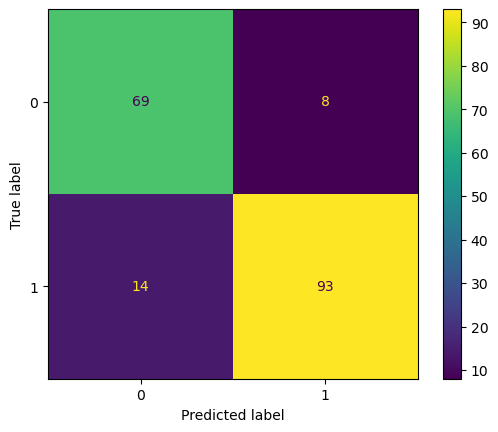

In [155]:
cm = confusion_matrix(y_test, y_pred_sc)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# SVM

In [156]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=1,gamma=0.1)
clf.fit(X_train_scaled, y_train)
y_pred_svm = clf.predict(X_test_scaled)

In [164]:
accuracy_score(y_train, clf.predict(X_train_scaled))

0.8950953678474114

In [163]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label=1)
recall_svm = recall_score(y_test, y_pred_svm, pos_label=1)
f1_svm = f1_score(y_test, y_pred_svm, pos_label=1)
print(f'Accuracy:{accuracy_svm}\nPrecision:{precision_svm}\nRecall:{recall_svm}\nf1:{f1_svm}')

Accuracy:0.8695652173913043
Precision:0.8952380952380953
Recall:0.8785046728971962
f1:0.8867924528301887


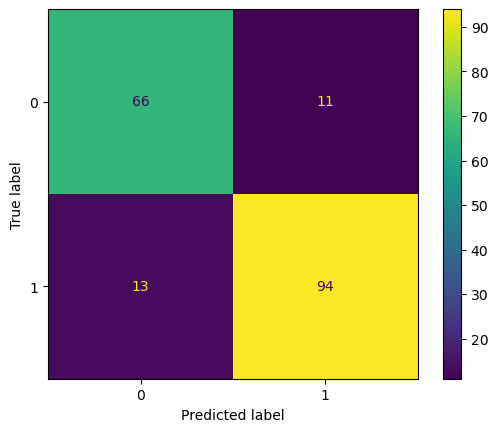

In [159]:
cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

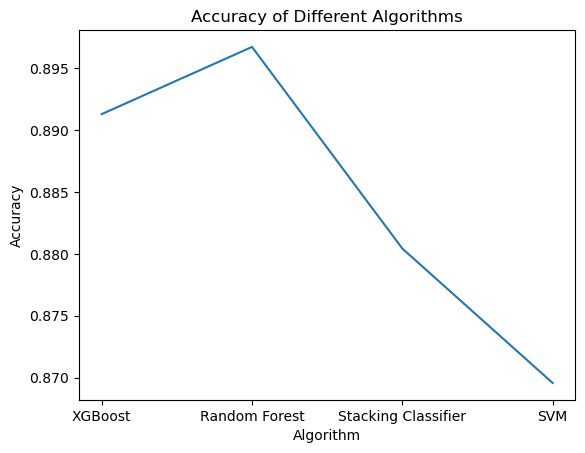

In [160]:
plt.plot(['XGBoost', 'Random Forest', 'Stacking Classifier', 'SVM'], [accuracy_XG, accuracy_rf, accuracy_sc, accuracy_svm])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.show()


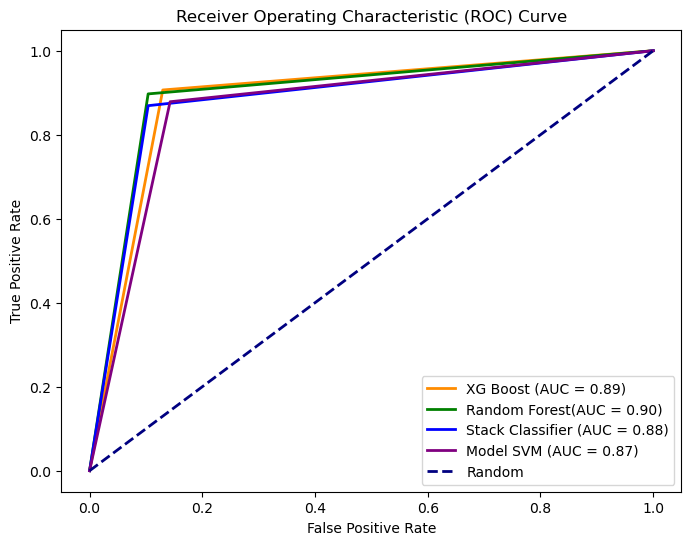

In [162]:
###### import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_xg)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_rf)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_sc)
roc_auc3 = auc(fpr3, tpr3)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'XG Boost (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Random Forest(AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='blue', lw=2, label=f'Stack Classifier (AUC = {roc_auc3:.2f})')
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'Model SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
